In [ ]:
pip install PySide6 pyqtgraph pyserial


: 

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.close('all')


In [7]:
import time
import serial

PORT   = "COM8"     # adjust
BAUD   = 115200
MAXPTS = 1000
HEADER = "# BMM350 CSV"

ser = serial.Serial(PORT, BAUD, timeout=1)

# wait for header
start = time.time()
while time.time() - start < 8:
    line = ser.readline().decode("utf-8", errors="ignore").strip()
    if line.startswith(HEADER):
        break
else:
    ser.close()
    raise RuntimeError("HEADER not seen. Wrong sketch / wrong COM?")

xs=[]; ys=[]; zs=[]

while len(xs) < MAXPTS:
    s = ser.readline().decode("utf-8", errors="ignore").strip()
    if not s or s.startswith("#") or s=="DONE":
        continue
    parts = s.split(",")
    if len(parts)!=3: continue
    try:
        x,y,z = map(float, parts)
    except:
        continue
    xs.append(x); ys.append(y); zs.append(z)

ser.close()

print("collected", len(xs), "points")


collected 1000 points


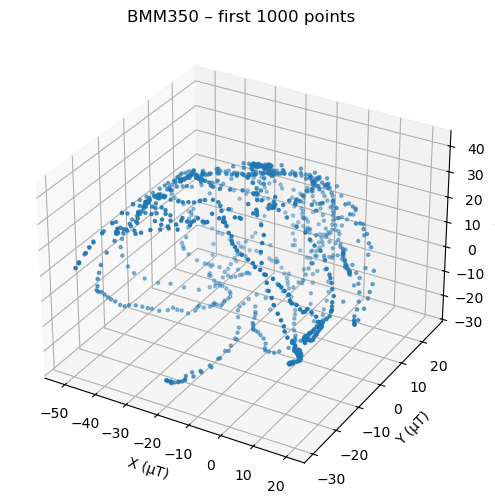

In [8]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, s=5)
ax.set_xlabel('X (µT)')
ax.set_ylabel('Y (µT)')
ax.set_zlabel('Z (µT)')
ax.set_title('BMM350 – first 1000 points')
plt.show()
